# Overlaying three spatial layers in the same coordinate system:

- Layer 1 (background): 2D surface mesh
- Layer 2 (middle):     1D pipe network
- Layer 3 (connectors): 1D–2D coupling links

### Visual encoding

| Component   | Color      | Size   | Meaning       |
| ----------- | ---------- | ------ | ------------- |
| 2D nodes    | light blue | tiny   | surface cells |
| 2D edges    | light blue | thin   | surface flow  |
| 1D edges    | black      | thick  | pipes         |
| 1D nodes    | black      | medium | manholes      |
| 1D–2D links | red        | thin   | inlets        |


### Loading all required data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
# Nodes
nodes_2d = pd.read_csv("urban-flood-modelling/2d_nodes_static.csv")
nodes_1d = pd.read_csv("urban-flood-modelling/1d_nodes_static.csv")

# Edges
edges_2d = pd.read_csv("urban-flood-modelling/2d_edge_index.csv")
edges_1d = pd.read_csv("urban-flood-modelling/1d_edge_index.csv")

# Coupling
connections = pd.read_csv("urban-flood-modelling/1d2d_connections.csv")


## Start the base figure (2D surface first)

### Plot 2D edges (surface mesh)

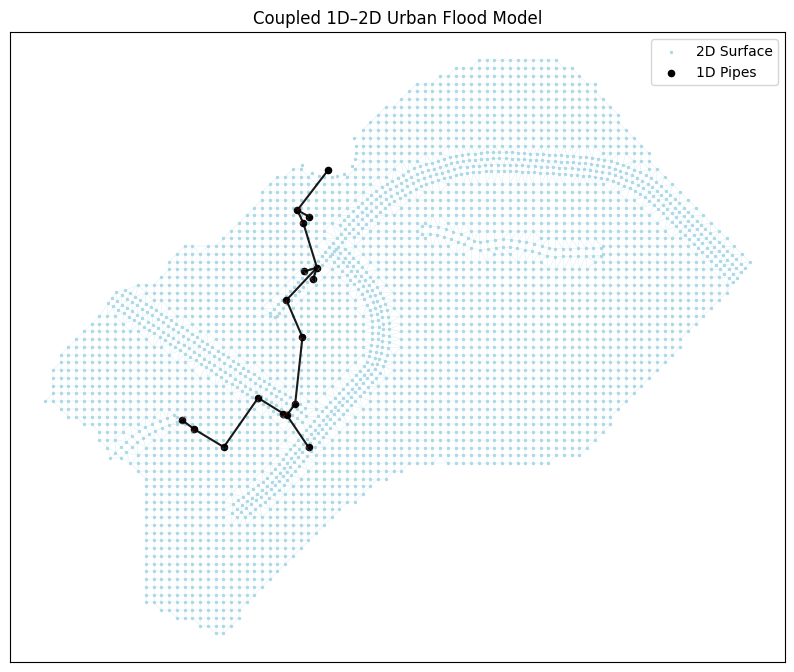

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))

# Layer 1: Plot 2D edges (surface mesh)
for _, row in edges_2d.iterrows():
    x = [
        nodes_2d.loc[row["from_node"], "position_x"],
        nodes_2d.loc[row["to_node"], "position_x"]
    ]
    y = [
        nodes_2d.loc[row["from_node"], "position_y"],
        nodes_2d.loc[row["to_node"], "position_y"]
    ]
    ax.plot(x, y, color="lightblue", linewidth=0.3, alpha=0.5)

# Layer 1: Plot 2D nodes
ax.scatter(
    nodes_2d["position_x"],
    nodes_2d["position_y"],
    s=2,
    color="lightblue",
    label="2D Surface"
)

# Layer 2: Plot 1D edges (pipes)
for _, row in edges_1d.iterrows():
    x = [
        nodes_1d.loc[row["from_node"], "position_x"],
        nodes_1d.loc[row["to_node"], "position_x"]
    ]
    y = [
        nodes_1d.loc[row["from_node"], "position_y"],
        nodes_1d.loc[row["to_node"], "position_y"]
    ]
    ax.plot(x, y, color="black", linewidth=1.5, alpha=0.9)

# Layer 2: Plot 1D nodes (manholes)
ax.scatter(
    nodes_1d["position_x"],
    nodes_1d["position_y"],
    s=20,
    color="black",
    label="1D Pipes"
)

# Layer 3: Plot 1D–2D coupling (red links)
for _, row in connections.iterrows():
    x = [
        nodes_1d.loc[row["node_1d"], "position_x"],
        nodes_2d.loc[row["node_2d"], "position_x"]
    ]
    y = [
        nodes_1d.loc[row["node_1d"], "position_y"],
        nodes_2d.loc[row["node_2d"], "position_y"]
    ]
    ax.plot(x, y, color="red", alpha=0.3, linewidth=0.8)

# Final formatting
ax.set_aspect("equal")
ax.set_title("Coupled 1D–2D Urban Flood Model")
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc="upper right")
plt.show()

### Plot 2D nodes

In [38]:
ax.scatter(
    nodes_2d["position_x"],
    nodes_2d["position_y"],
    s=2,
    color="lightblue",
    label="2D Surface"
)


## Overlay 1D pipe network

### Plot 1D edges (pipes)

In [39]:
for _, row in edges_1d.iterrows():
    x = [
        nodes_1d.loc[row["from_node"], "position_x"],
        nodes_1d.loc[row["to_node"], "position_x"]
    ]
    y = [
        nodes_1d.loc[row["from_node"], "position_y"],
        nodes_1d.loc[row["to_node"], "position_y"]
    ]
    ax.plot(x, y, color="black", linewidth=1.5, alpha=0.9)


### Plot 1D nodes (manholes)

In [40]:
ax.scatter(
    nodes_1d["position_x"],
    nodes_1d["position_y"],
    s=20,
    color="black",
    label="1D Pipes"
)


## Overlay 1D–2D coupling (the red links)

In [41]:
for _, row in connections.iterrows():
    x = [
        nodes_1d.loc[row["node_1d"], "position_x"],
        nodes_2d.loc[row["node_2d"], "position_x"]
    ]
    y = [
        nodes_1d.loc[row["node_1d"], "position_y"],
        nodes_2d.loc[row["node_2d"], "position_y"]
    ]
    ax.plot(x, y, color="red", alpha=0.3, linewidth=0.8)


## Final formatting

In [42]:
ax.set_aspect("equal")
ax.set_title("Coupled 1D–2D Urban Flood Model")
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc="upper right")
plt.show()
